# Data structuring

### The Pandas way

*Andreas Bjerre-Nielsen*

# Recap

*What have we learned about visualizations?*

- 
- 

# Agenda
We will learn about Pandas data structures and procedures. Specifically we go through:
- Viewing and selecting data
- Missing data
- Series:     
    - procedures and data types: 
        - numerical; boolean; strings and temporal
- DataFrame: 
    - loading and storing data
    - split-apply-combine (groupby)
    - joining datasets
    
A small exercise

# Why we do structuring

## Motivation
*Why do we want to learn data structuring?*

<center><img src='https://raw.githubusercontent.com/abjer/sds/master/slides/figures/janitor.png'></center>

## Motivation (continued)

- Data never comes in the form of our model. We need to 'wrangle' our data.

*Can our machine learning models not do this for us?* 

- Not yet :). The current version needs **tidy** data. What is tidy? 

Same as long - one row per observation.

# Getting prepared

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Pandas Data Stuctures

Why use Pandas?

1. simplicity - Pandas is built with Python's simplicity 
1. flexible and powerful tools for working with data
1. speed - build on years of research about numeric computation
1. development - breathtaking speed of new tools coming

*How do we work with data in Pandas?*


- We use two fundamental data stuctures: **DataFrame** and **Series**.

## Pandas DataFrames

*What is a DataFrame?*

- A matrix with labelled columns and rows (which are called indices). Example:

In [3]:
df = pd.DataFrame(data=[[1,2],[3,4]], 
                  columns=['A','B'], 
                  index=['i', 'ii'])

print(df)

    A  B
i   1  2
ii  3  4


- An object with many powerful methods.

- *To note*: In Python we can describe it as a list of lists of a dict of dicts.

## Pandas DataFrames (continued)

Pandas is built on top of [`numpy`](http://www.numpy.org/) a Python framework similar to matlab. 

Many functions from `numpy` can be applied directly to Pandas. We can convert a DataFrame to a `numpy` matrix with **values** method.

In [4]:
df.values

array([[1, 2],
       [3, 4]], dtype=int64)

## Pandas series


*What is a Series?*



- A vector/list with labels for each entry. Example:

In [5]:
ser =  pd.Series([1,'b',10/3,True])

ser

0          1
1          b
2    3.33333
3       True
dtype: object

*What data structure does this remind us of?*



- A mix of Python list and dictionary (more info follows)

## Series and DataFrames
*How are Series related to DataFrames?*

Every column is a series. Example: access as object method:

In [ ]:
df.A

Another option is access as key:

In [ ]:
df['B']

*To note:* The latter option more robust as variables named same as methods, e.g. `count`, cannot be accesed.

## Indices
*Why don't we just use matrices?*

- labelled columns are easier to work with
- indices may contain fundamentally different data structures
    - e.g. time series, hierarchical groups

# Using pandas Series

## Generation
Let's revisit our series

In [9]:
ser

0          1
1          b
2    3.33333
3       True
dtype: object

Components in series 
- index: label for each observation
- values: observation data
- dtype: the format of the series - object allows any data type

## Generation (continued)
How do we set custom index? Example:

In [11]:
num_data = range(0,3)

[0, 1, 2]

In [13]:
ser_num = pd.Series(num_data, index=['B','C','A'])
ser_num

B    0
C    1
A    2
dtype: int32

## Generation (continued)

The dictionary and series. Example:

In [14]:
d = {'yesterday':0, 'today':1, 'tomorrow':3}

ser_num_2 = pd.Series(d)
ser_num_2

today        1
tomorrow     3
yesterday    0
dtype: int64

How is the series different from a dict?

- The series has powerful methods:

In [15]:
ser_num_2.median()

1.0

## Converting data types 

The data type of a series can be converted with the **astype** method:

In [19]:
ser_num_2.astype(float)

today        1.0
tomorrow     3.0
yesterday    0.0
dtype: float64

In [18]:
ser_num_2.astype(str).tolist()

['1', '3', '0']

## Missing data type

What fundamental data type might we be missing?

Empty data

In [ ]:
None # python
np.nan #numpy/Pandas

Important methods: **isnull**, **notnull**, **dropna**. Example

In [ ]:
ser_num_3 = pd.Series([1, np.nan, 2.4, None])
ser_num_3

In [24]:
ser_num_3.dropna()

0    1.0
2    2.4
dtype: float64

## Missing data type (continued)

Can we change the missing values?

Yes. One example is to uniformly assign a value with **fillna**:

In [26]:
ser_num_3.fillna(3.14)

0    1.00
1    3.14
2    2.40
3    3.14
dtype: float64

A more sophisticated way is forward-fill which is called **ffill**:

In [ ]:
ser_num_3.ffill()

Other ways include **interpolate**, **dropna** and **bfill** which we do not cover.

## Numeric operations

How do we manipulate series?

Like Python data! An example:

In [31]:
ser_num_3 ** 2

0    1.00
1     NaN
2    5.76
3     NaN
dtype: float64

Are other numeric python operators the same?

Yes **/**, **//**, **-**, **&ast;**, **&ast;&ast;**, **+=**, **-=** etc. behave as expected.

## Numeric methods

Pandas series has powerful numeric methods. Have we seen one?

In [ ]:
ser_num_2.median()

Other useful methods include: **mean**, **median**, **min**, **max**, **var**, **describe**, **quantile** and many more.

In [33]:
ser_num_2.describe()

,A,B
count,2.000000,2.000000
mean,2.000000,3.000000
std,1.414214,1.414214
min,1.000000,2.000000
25%,1.500000,2.500000
50%,2.000000,3.000000
75%,2.500000,3.500000
max,3.000000,4.000000


## Numeric methods (continued)
An important method is `value_counts`. This counts number for each observation. 

Example:

In [37]:
np.mean(ser_vc)

2.0

In [36]:
ser_vc.nunique()

3

In [35]:
for i in ser_vc.unique():
    print(i)

1
2
3


In [34]:
ser_vc = pd.Series([1,2,2,3])

ser_vc.value_counts()

2    2
3    1
1    1
dtype: int64

What is observation in the value_counts output - index or data?

## Numeric methods (continued)

*Are there other powerful numeric methods?*

Yes: examples include 
- **unique**, **nunique**: the unique elements and the count of unique elements
- **cut**, **qcut**: partition series into bins 
- **diff**: difference every two consecutive observations
- **cumsum**: cumulative sum
- **nlargest**, **nsmallest**: the n largest elements 
- **idxmin**, **idxmax**: index which is minimal/maximal 
- **corr**: correlation matrix

Check [series documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) for more information.

## Logical operators

Does our standard logical operators work?

Yes: **==**, **!=**, **&**, **|** work elementwise. Example:

In [38]:
ser_num_2

today        1
tomorrow     3
yesterday    0
dtype: int64

What datatype is returned? What about the **|** operator?

In [48]:
ser_num_2[selection]

today        1
yesterday    0
dtype: int64

In [46]:
selection = (ser_num_2==0) | (ser_num_2==1)

## Logical operators (continued)
Check for multiple equal: **isin**. Example:

In [51]:
ser_num_2 *= 2

In [56]:
rng = list(range(3))

In [63]:
rng

[0, 1, 2]

In [62]:
ser_num_2

today        2
tomorrow     6
yesterday    0
dtype: int64

In [60]:
ser_num_2.isin(rng)

today         True
tomorrow     False
yesterday     True
dtype: bool

## String operations

Which operators could work for string?

Operators **+**, **+=**. Example:

In [67]:
ser_str_alt = pd.Series([' Min',' ven',' pedro'])

In [68]:
ser_str+ser_str_alt # adding two series together is also possible

0         My Min
1      amigo ven
2    pedro pedro
dtype: object

In [64]:
ser_str = pd.Series(['My', 'amigo', 'pedro'])
ser_str+' Hello'

0       My Hello
1    amigo Hello
2    pedro Hello
dtype: object

## String operations (continued)
The powerful .str has several powerful methods e.g. `contains`, `capitalize`. Example:

In [70]:
ser_str

0       My
1    amigo
2    pedro
dtype: object

In [ ]:
ser_str.str.upper()

In [ ]:
ser_str.str.contains('M')

The .str method also has slicing - example: 

In [73]:
ser_str.str[:2]

0    My
1    am
2    pe
dtype: object

## Temporal data type

Pandas Series has support for temporal data as well. Example:


In [74]:
dates = ['20170101', '20170727', '20170803', '20171224']

In [76]:
datetime_index = pd.to_datetime(dates)

In [77]:
ser_time = pd.Series(datetime_index)
ser_time

0   2017-01-01
1   2017-07-27
2   2017-08-03
3   2017-12-24
dtype: datetime64[ns]

What can it be used for

## Using temporal data
Why is temporal data powerful?

- conversion to time series; example:

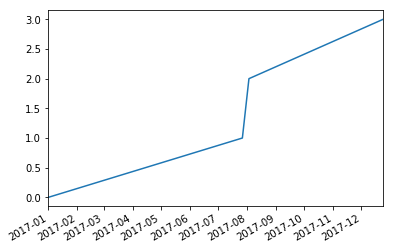

In [81]:
ser_time_2 = pd.Series(index=datetime_index, data=range(4))

ser_time_2.plot()

## Using temporal data (continued)
What other uses might be relevant?

Temporal has the **.dt** method and its sub-methods. Example:

In [85]:
ser_time.dt.second

0    0
1    0
2    0
3    0
dtype: int64

In [82]:
ser_time.dt.month

0     1
1     7
2     8
3    12
dtype: int64

The dt method has several other sub-methods including **year**, **day**, **weekday**, **hour**, **second**

*To note:* Your temporal data may need conversion - see other dt sub-methods: **tz_localize** and **tz_convert** for that

## Temporal data type (continued)

What happens if we convert to integers?

In [89]:
pd.to_datetime([123512321,2132321321], unit='s')

DatetimeIndex(['1973-11-30 12:58:41', '2037-07-27 15:28:41'], dtype='datetime64[ns]', freq=None)

In [86]:
ser_time.astype(np.int64)

0    1483228800000000000
1    1501113600000000000
2    1501718400000000000
3    1514073600000000000
dtype: int64

What is this? 
- The underlying structure is epoch time.
- Epoch time measures seconds since Jan. 1, 1970, at 00:00:00 - GMT time zone. Here the output is nanoseconds(ns).

## Viewing and editing data

The simplest way to view a series (and dataframe) is as follows:

In [96]:
ser_num_4 = pd.Series(np.random.normal(size=[100000]))

ser_num_4.tail(10) # prints first 30, last 30 observations

99990   -0.906753
99991   -1.138565
99992    0.125433
99993    0.583006
99994   -0.127683
99995    0.683099
99996   -0.023049
99997    0.566708
99998    0.215449
99999   -1.509640
dtype: float64

The **head** and **tail** respectively prints the first and last observations.

In [ ]:
ser_num_4.tail(3) # prints first 3 observation, 

## Viewing and editing data (continued)

The **loc** methods provide a powerful way of accessing subsets of a series through the index.

In [98]:
my_dict = {'A':1,'B':2}
my_dict['B']

2

In [97]:
ser_num_2.loc['tomorrow']

6

We can select multiple elements:

In [ ]:
indices = ['today', 'tomorrow']
ser_num_2.loc[indices]

The **iloc** method access a subset of a series using integers:

In [105]:
ser_num_4.iloc[1000:1005]

1000   -1.217063
1001    0.947759
1002   -0.069886
1003   -0.933533
1004    0.613368
dtype: float64

## Viewing and editing data (continued)

This can be used to alter the values:

In [ ]:
ser_num_2.loc['tomorrow'] = 4 # change value of element with index 'tomorrow' to 4
ser_num_2

In [108]:
pd.Series(range(3),index=['A', 'A','A'])

A    0
A    1
A    2
dtype: int32

***WARNING!#@***
- Series indices are NOT unique

## Viewing and editing data (continued)

We can also use boolean series for selection:

In [109]:
selection = ser_num_3.notnull()

sub = ser_num_3[selection]

sub

0    1.0
2    2.4
dtype: float64

*To note:* could also have been performed with **dropna**.

## Series recap

- Most Python operations also work for Pandas!
- Series are also good for operating strings and boolean stuff
- Series has powerful methods for fast selection
- Two new datatypes:
    - Empty data (np.nan, None)
    - Temporal data (datetime) 

More remains unexplored:


- the [category data datatype](https://pandas.pydata.org/pandas-docs/stable/categorical.html) makes strings ultra fast and memory efficient


# DataFrames 

## A small exercise

While working with DataFrame we will work on a small exercise. The exercise consists: 
- loading the data;
- data preprocessing;
- selecting a relevant sample;
- employ dataset to gain insights through computations and visualizations

# DataFrame: loading and storing

## Reading DataFrames

Pandas can read CSV files very easily. Download the file in url:

In [26]:
gh_raw = "https://raw.githubusercontent.com/"
user = "abjer/"
repo = "sds/"
branch = "master/"
file = "data/bechdel.csv"
url = gh_raw + user + repo + branch + file

url



## Reading DataFrames (continued)

Now let's try opening it:

- As local file:

In [20]:
local_path = 'C:/Users/bvq720/sds/data/bechdel.csv'

df = pd.read_csv(local_path)

- As online file:

In [21]:
df = pd.read_csv(url)

Contents:

In [ ]:
df.head(2)

## Reading other data types

Other pandas readers include:  excel, sql, sas, stata and many more.

*To note:* an incredibly fast and useful module for reading and writing data is [feather](https://github.com/wesm/feather).

## Storing data

Data can be stored in a particular format with to_(FORMAT) where (FORMAT) is the file type such as csv. Let's try with to_csv:



In [ ]:
df.to_csv('bechdel.csv', index=False)

Always!!! use index=False when exporting - otherwise the index will be exported too!

## Exercise - problem: input-output

Some data can be 'scraped' as is - they are already structured. 

Q1) Use Pandas' CSV reader to fetch National Oceanic and Atmospheric Administration(NOAA)'s daily data weather from 1864 for various stations - available [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv). Description can be found [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/readme.txt).

- Note that for compressed files you need to specify the keyword `compression`.
- Note also that keyword `header` can be specified as the CSV has no column names.

## Exercise - solution: input-output

In [2]:
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url, 
                         compression='gzip', #decompress gzip
                         header=None, #use no header information from the csv                         
                         parse_dates=[1]) # option for parsing dates

# DataFrame: viewing and selecting

## Selecting rows in DataFrames

Are there similarities between how Series and DataFrame views data?

* Yes, very similar, few differences.

Which methods did the Series for inspection and do the work? 

- **loc**, **iloc**, **head** and **tail** work as expected selecting rows. Example: 

In [ ]:
df_weather.iloc[:3]

## Selecting rows in DataFrames (continued)

What other methods do we have for selecting rows?

- Right: boolean series. These also work for DataFrames. Example:

In [ ]:
df_weather[df_weather.obs_type=='PRCP'] # select rain data

## Selecting columns in DataFrames

Selecting columns is almost too easy:

In [ ]:
df_sel = pd.DataFrame([[1,2,3], [4,5,6]], columns=['A', 'B', 'C'])

print(df_sel[['B','A']]) # selecting A and B columns

Could there be another way?

- Yes: loc and iloc can also select columns. Examples:

In [ ]:
print(df_sel.loc[[1],['A','B']])

In [ ]:
print(df_sel.iloc[:,1:])

What does **':'** do in iloc/loc?

## Exercise - problem: format and select

Q2) Structure your weather DataFrame by using only the relevant columns, rename them. Make sure observations are correctly formated (how many decimals should we add? one?).

Q3) Select data for the first station in the data (`ITE00100550`) and only observations for maximal temperature. Make a copy of the DF.

## Exercise - solution: format and select

Q2) answer:

In [3]:
df_weather = df_weather.iloc[:,:4] # select only first four columns

column_names = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather.columns = column_names # set column names

df_weather.obs_value = df_weather.obs_value / 10 # convert last digit to decimal

Q3 answer:

In [4]:
select_stat = df_weather.station == 'ITE00100550' # boolean: first weather station
select_tmax = df_weather.obs_type=='TMAX' # boolean: maximal temp.

df_select = df_weather[select_stat & select_tmax].copy() # row selection - require both conditions


# DataFrame: sorting and indexing

## Setting indices

We can set the index of a DataFrame using its method **set_index**. Example:

In [ ]:
df.set_index('A')

We can use the keyword `inplace` which will replace the DataFrame:

In [ ]:
df.set_index('A', inplace=True)
df

## Removing indices

Sometimes we wish to remove the index. This is done with the **reset_index** method:

In [ ]:
df.reset_index()

By specifying the keyword `drop`=True  we delete the columns. Note `inplace` also works.

*To note:* Indices can have multiple levels, in this case `level` can be specified to delete a specific level.

# Sorting

A DataFrame can be sorted with **sort_values**; this method takes one or more columns to sort by.


In [ ]:
df_weather.sort_values(by=['station', 'obs_type','datetime'], 
                       ascending=[0,1,1],
                       inplace=True)

df_weather.head(3)

*To note:* Sorting by index is possible with `sort_index`.

## Exercise - problem: index

Q4) With your data for the first weather stations - set your datetime variable as temporal index and make a timeseries plot.


## Exercise - solution: index

Q4) answer:

In [ ]:
df_select\
    .set_index(['datetime'])\
    .obs_value\
    .plot(figsize=(11,6))

# Split-apply-combine 

Example: grouping by x and calculating mean of y

<center><img src='https://raw.githubusercontent.com/abjer/sds/master/slides/figures/split-apply-combine.png'></center>

## groupby

A powerful tool in DataFrames are the **groupby** method. Example:

In [ ]:
df_select['week'] = df_select.datetime.dt.week
gb_week = df_select.groupby('week')

tmax_mean_by_week = gb_week.obs_value.mean()

tmax_mean_by_week.head(4)

In [ ]:
tmax_mean_by_week.plot()

## groupby (2)
*What does the groupby by method do?*

- It splits the data.

Can other functions be applied?

- Yes: mean, std, min, max all work. 

*To note:*     Using .apply() method and inserting a custom function also works

## groupby (3)
*Can we use multiple variables for grouping?*

- Yes - example:

In [ ]:
df_weather.groupby(['station', 'obs_type']).obs_value.mean().head(4)

Note grouping with multiple variables uses a [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.MultiIndex.html) which we do not cover.

## groupby (4)
*Can we use groupby in a loop?*

Yes, we can iterate over a groupby object. Example:

In [116]:
results = {}
for group, group_df in gb_week:
    group_mean = group_df.obs_value.mean()
    results[group] = group_mean
    
results    

## Exercise - problem: split-apply-combine

Q5) Plot the monthly max,min+quartiles temperature for our stations. 

Hint: the method describe describe computes all these measures.

Q5) solution:

In [ ]:
df_select['month'] = df_select.datetime.dt.month
df_select.groupby('month').obs_value.describe().iloc[:,-5:].plot()

#  Joining data

Until now we've worked with one DataFrame at a time.

We will now learn to put them together.

## Concatenating DataFrames
Let's try to vertically put two DataFrames together:

In [ ]:
df_j1 = pd.DataFrame([[1,2],[3,4]], columns=['A', 'B'])
print(df_j1)

In [ ]:
df_j2 = pd.DataFrame([[5,6],[7,8]], columns=['A', 'B'])
print(df_j2)

In [ ]:
df_vert = pd.concat([df_j1, df_j2]) # stack vertically - default
print(df_vert) 

## Concatenating DataFrames (continued)

Let's do it horizontally:

In [ ]:
df_j3 = pd.DataFrame([[5,6],[7,8]], columns=['C', 'D'])

print(pd.concat([df_j1, df_j3],axis=1)) # put together horizontally - axis=1

The **concat** method creates one big DataFrame from two smaller. It can be used when when we have two or more DataFrames that either share indices or columns.

## Merging DataFrames

We can merge DataFrames which share common identifiers, row by row. Example:

In [ ]:
df_j4 = pd.DataFrame([[2,3],[7,8]], columns=['B', 'C'])

print(pd.merge(df_j1, df_j4))

**merge** is useful for when you have two or more datasets about the same entities, e.g. data about individual where you merge by social security number.

In [4]:
import pandas as pd

## Merging DataFrames (continued)
Merging can be either of four types.
- inner merge: observations exist in both dataframes [default]
- left (right) merge: observations exist in left (right) dataframe
- outer merge: observations exist either in left or in right dataframe



<center><img src='https://raw.githubusercontent.com/abjer/sds/master/slides/figures/sql-joins.png'></center>

## Merging DataFrames (continued)
Let's try left and outer:

In [ ]:
print(pd.merge(df_j1, df_j4, how='left'))

Exercise: try to describe in words what happens.

## Exercise - problem: data joining
Q6) Make a function that downloads and formats the stations data.

Q7) Using your function that makes a loop that fetch processed data for years 1864-1867. Concatenate this data vertically.

Q8) Merge station locations onto weather data. Locations can be found at: https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Note that the location this has fixed width format - does there exist a reader for that?

## Exercise - solution: data joining
Q6) answer:

In [ ]:
prefix = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/'
suffix = '.csv.gz'

def fetch_format_weather(year):
    url = prefix + str(year) + suffix
    
    df_weather = pd.read_csv(url, 
                             compression='gzip', #decompress gzip
                             header=None, #use no header information from the csv                         
                             parse_dates=[1]) # option for parsing dates

    df_weather = df_weather.iloc[:,:4] # select only first four columns

    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names # set column names

    df_weather.obs_value = df_weather.obs_value / 10 # convert last digit to decimal
    
    return df_weather

## Exercise - solution: data joining (continued)
Q7) answer: 

In [ ]:
dfs = []
for year in range(1864, 1868):
    dfs.append(fetch_format_weather(year))
    
df_concat = pd.concat(dfs, ignore_index=True)

Q8) answer:

In [ ]:
url_stats = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt"
df_stats = pd.read_fwf(url_stats, header=None).iloc[:,:4]
df_stats.columns = ['station', 'latitude', 'longitude', 'altitude']
df_concat_coords = df_concat.merge(df_stats)

# Wide and long format conversion

## To long format

A DataFrame can be collapsed into a Series with the **stack** command:

In [ ]:
df_j1.stack()

Quiz: What happend to our observations? What happend to our columns?

-  Observations are now vertically stacked and each row now has an extra index with column information.

## To wide format

Likewise we can transform a long DataFrame with the unstack

In [ ]:
series_long = pd.DataFrame(data=[[0,'A',1],[0,'B',2],[1,'A',3],[1,'B',4]],
                       columns=['index','column','observation'])\
                .set_index(['index','column'])\
                .observation
        
series_long        

## Exercise - problem: tidy format
Q9) Is our weather dataset in tidy format? If not how can we transform it? 

Hint: **unstack**'ing the observation type may help

Q10) With your tidy data set - convert the temperature variables to Fahrenheit. Conversion is F = 32 + 1.8 C where F is Fahrenheit and C is Celsius.

Q9) answer:

No our weather dataset is not in a tidy format. This can be achieved as follows:

In [67]:
df_concat_tidy = df_concat\
                    .set_index(['station','datetime','obs_type'])\
                    .unstack(level=2)\
                    .obs_value\
                    .reset_index()

Q10) answer:

In [69]:
for temp_col in ['TMAX', 'TMIN']:
    df_concat_tidy[temp_col+'_f'] = (df_concat_tidy[temp_col]*1.8)+32

# Summary

## DataFrame insights
- How to load and storing data, in particular with **read_csv**
- Indices can be manipulated with **set_index**, **reset_index**
- Split-apply-combine is powerful and easy using **groupby** method
- Joining multiple datasets can be either with **concat** (which stacks dataframes)  and **merge**
- We can go convert wide to long (and vice versa) with **stack** (**unstack**)

## Learning more
Many important topics for DataFrames have been skipped. These include:

- Copying data in python: deep vs. shallow - **copy** method for dataframes   
- Working with duplicates: **duplicated**, **drop_duplicates*